In [1]:
import numpy as np
import matplotlib.pyplot as plt
from palettable.colorbrewer.qualitative import Set2_7

In [2]:
colours = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
params = {
   'axes.labelsize': 16,
   'font.size': 14,
   'legend.fontsize': 18,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   'figure.figsize': [7, 5],
   'hist.bins': 20,
}
rcParams = plt.rcParams
rcParams.update(params)
graph_dir = "graphs/"
cs = Set2_7.mpl_colors


## Single machine

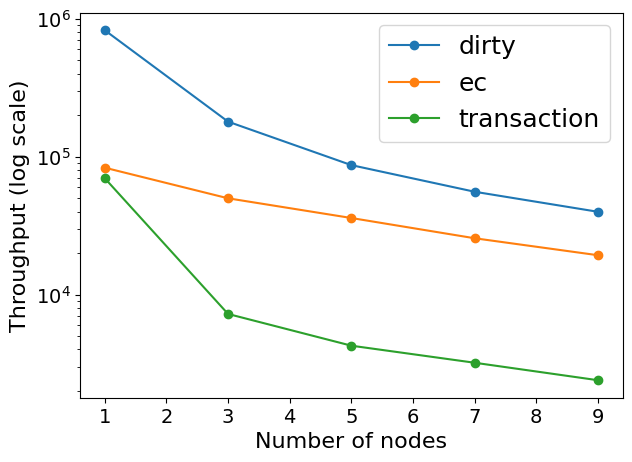

In [7]:
fig, ax = plt.subplots()

nodes = [1,3, 5, 7, 9]
dirty_throughput = [825007,179342,86800, 55657, 39836]
ec_throughput = [83167,49893,35906,25611,19294]
trans_throughput = [69708,7238,4262,3206,2395]
ax.semilogy(nodes, dirty_throughput, marker = 'o', label='dirty')
ax.semilogy(nodes, ec_throughput, marker='o', label='ec')
ax.semilogy(nodes, trans_throughput, marker='o', label='transaction')
ax.set_ylabel('Throughput (log scale)')
ax.set_xlabel('Number of nodes')
ax.legend()

fig.savefig(f'{graph_dir}tp_nodes_single.pdf', bbox_inches='tight')

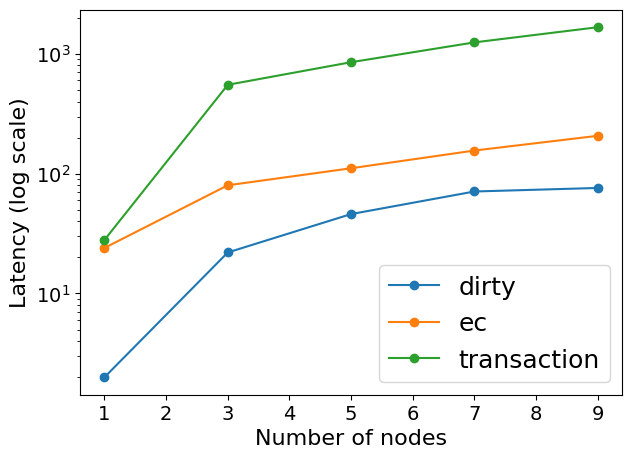

In [8]:
fig, ax = plt.subplots()

nodes = [1, 3, 5, 7, 9]
ec_latency = [24,80,111,156,207]
dirty_latency = [2, 22,46,71,76]
trans_latency = [28,552,852,1247,1669]
ax.semilogy(nodes, dirty_latency, marker='o', label='dirty')
ax.semilogy(nodes, ec_latency, marker='o', label='ec')
ax.semilogy(nodes, trans_latency, marker='o', label='transaction')
ax.legend()
ax.set_ylabel('Latency (log scale)')
ax.set_xlabel('Number of nodes')

fig.savefig(f'{graph_dir}lat_nodes_single.pdf', bbox_inches='tight')

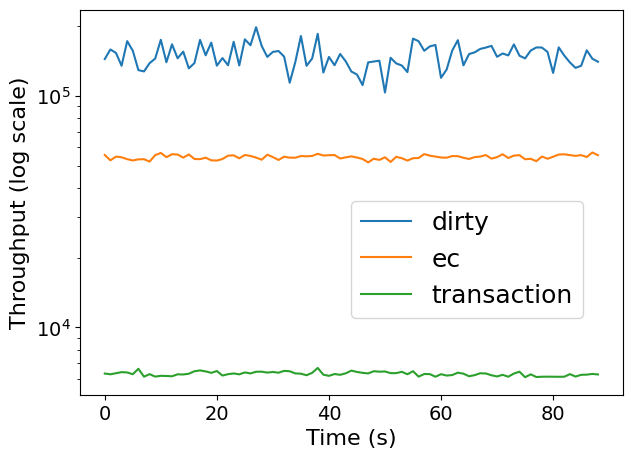

In [18]:
# 5 nodes
ec_tp_change= [55520,52670,54631,54268,53262,52590,
                                   53165,53251,51992,55437,56667,54349,55946,
                                   55790,54095,55824,53365,53278,54055,52666,
                                   52535,53343,55158,55333,53737,55539,54976,
                                   54107,52983,55668,54382,52842,54577,54075,
                                   54031,54959,54794,54987,56162,55242,55415,
                                   55494,53628,54233,54769,54141,53350,51573,
                                   53514,52869,54266,51802,54537,53779,52524,
                                   53781,53883,56023,55150,54645,54166,54043,
                                   54944,54878,53997,53367,54360,54676,55489,
                                   53548,54359,55930,53885,55179,55420,53228,
                                   53463,52205,54674,53494,54558,55767,55912,
                                   55456,55056,55438,54423,56922,55406]

trans_tp_change = [6315,6267,6334,6403,
                                                   6382,6273,6620,6119,6276,
                                                   6124,6173,6162,6145,6266,
                                                   6255,6302,6459,6514,6450,
                                                   6357,6474,6189,6275,6320,
                                                   6264,6384,6321,6428,6433,
                                                   6374,6412,6366,6484,6458,
                                                   6322,6305,6209,6357,6676,
                                                   6244,6171,6283,6236,6327,
                                                   6500,6417,6357,6322,6461,
                                                   6432,6445,6340,6339,6424,
                                                   6270,6463,6122,6284,6278,
                                                   6117,6274,6189,6221,6369,
                                                   6306,6145,6215,6332,6317,
                                                   6206,6136,6233,6118,6315,
                                                   6429,6087,6264,6099,6116,
                                                   6121,6117,6114,6118,6278,
                                                   6127,6234,6246,6290,6257]

dirty_tp_change =[144213,158612,153252,134904,172318,156692,
129173,127482,138422,144915,174642,139727,
166946,145307,155228,131503,138520,174473,
149730,169779,135017,145585,135559,171189,
135312,175417,165453,197911,164232,147306,
154858,156210,147797,113956,140007,181347,
134808,144944,185412,126097,147284,135603,
151662,140917,127351,123629,111298,139510,
140701,141846,103400,146055,138080,135248,
126662,176741,172220,156564,163545,165869,
119623,129932,156978,173977,135414,151567,
154119,159499,161644,164437,147480,152397,
149523,166861,149066,145151,156923,161856,
161700,154832,125599,161964,149193,139377,
132094,134802,157348,144710,140431]



dirty_tp_change = np.array(dirty_tp_change)
ec_tp_change = np.array(ec_tp_change)
trans_tp_change = np.array(trans_tp_change)



fig, ax = plt.subplots()
ax.semilogy(dirty_tp_change, label='dirty')
ax.semilogy(ec_tp_change, label='ec')
ax.semilogy(trans_tp_change, label='transaction')
ax.set_ylabel('Throughput (log scale)')
ax.set_xlabel('Time (s)')
ax.legend(loc=(0.5, 0.2))

fig.savefig(f'{graph_dir}tp_time_single.pdf', bbox_inches='tight')

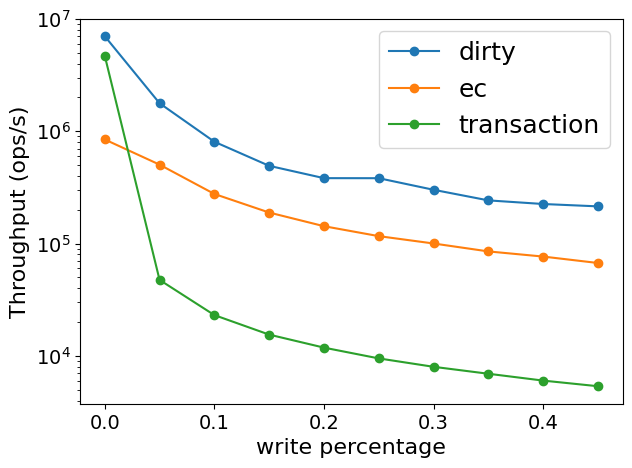

In [19]:
dirty_tp_rw = [214341,224977,242322,301110,381829,382221,491975,806151,1774494,7009840]
ec_tp_rw = [67141, 76614, 85137,100149,116443,142783,188880,276398,504068,844572]
trans_tp_rw = [5372, 6029,6936,7998,9500,11849,15471,23082,47467,4695325]

dirty_tp_rw = np.array(dirty_tp_rw)
ec_tp_rw = np.array(ec_tp_rw)
trans_tp_rw = np.array(trans_tp_rw)

write_pct = [1 - (i * 0.1 + (1 - 0.1 * i) * 0.5) for i in range(1, 11)]
fig, ax = plt.subplots()
ax.semilogy(write_pct, dirty_tp_rw, marker='o', label='dirty')
ax.semilogy(write_pct, ec_tp_rw, marker='o', label='ec')
ax.semilogy(write_pct, trans_tp_rw, marker='o', label='transaction')
ax.set_ylabel('Throughput (ops/s)')
ax.set_xlabel('write percentage')
ax.legend()

### Space overhead

#### pre benchmark

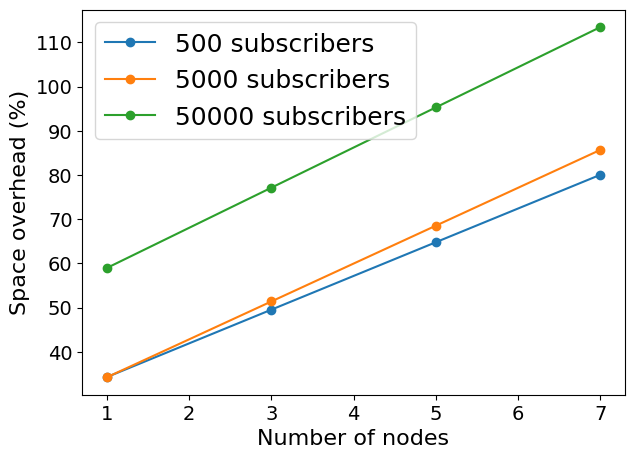

In [32]:
nodes = list(range(1, 8, 2))
dirty_sizes = [52468, 466852,4407076]
# ec_sizes = [
#     [72468,80468,88468,96468,104468 ],
#     [646852,726852,806852,886852,966852],
#     [6407076,7207076,8007076,8807076,9607076]
# ]

ec_sizes = [
    [70468, 78468, 86468, 94468],
    [626852,706852,786852,866852],
    [7007076,7807076,8607076,9407076]

    # [70468, 78468, 86468, 94468, 102468],
    # [626852,706852,786852,866852,946852],
    # [52668496,70009316,79760448,86009316]
]


overhead = [
    [(s - dirty_sizes[i]) / dirty_sizes[i] * 100 for s in ec_size]
    for i, ec_size in enumerate(ec_sizes)
]

fig, ax = plt.subplots()
ax.plot(nodes, overhead[0], marker='o', label='500 subscribers')
ax.plot(nodes, overhead[1], marker='o', label='5000 subscribers')
ax.plot(nodes, overhead[2], marker='o', label='50000 subscribers')
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Space overhead (%)')
ax.legend()


fig.savefig(f'{graph_dir}space_overhead_populate.pdf', bbox_inches='tight')

#### post benchmark

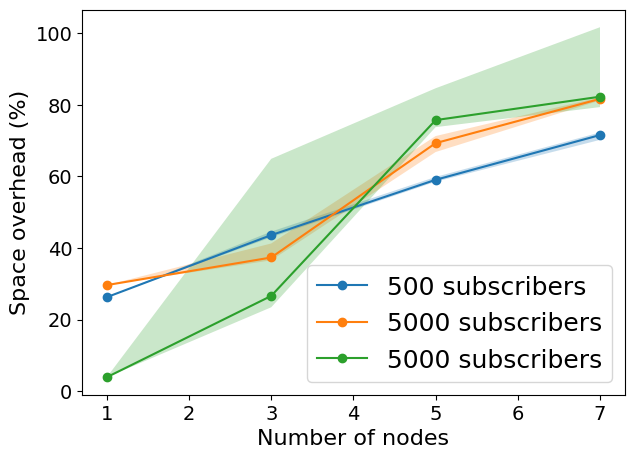

In [34]:
nodes = list(range(1, 8, 2))
dirty_sizes = [68468, 606852, 6606916]

# ec_sizes = [
#     [88468, 96468,104468,112468,120468],
#     [806852,886852,966852,1043044,1108260],
#     [7966692,8344612,8741632,9308740,9943204]
# ]

ec_sizes = [
    [[86468],
    [97492,98332, 99676],
    [109460, 115944, 108908, 107988, 108540],
    [118268, 120868, 117468, 115868, 117668, 117068, 116016]],

    [[786852], 
    [881104,824056,833636],
    [1027452, 1009324, 1012364, 1039412, 1046772],
    [1099436, 1105004, 1100036, 1102436, 1105436, 1107436, 1097636]
    ],

    [[6866616], 
     [8367088, 7947220, 13425120], 
     [10876556, 12198252, 11481264, 14979000, 11610920],
     [11773688, 14062320, 14864992, 11928932, 12042928, 11053496, 12587420]]

    # [[75350832],
    # [71624736, 79332120, 86695188],
    # [70782160, 70152764, 78365268, 88023724, 70910704],
    # [72567868, 77270544, 70041164, 74105268, 65525004, 68970412, 74795648]
    
]

ec_sizes2 = [[] for _ in range(len(ec_sizes))]


for i, ec_size in enumerate(ec_sizes):
    for e in ec_size:
        ec_sizes2[i].append([np.median(np.array(e)), np.percentile(np.array(e), 25), np.percentile(np.array(e), 75)])


overhead = np.array([
    [[(s[0] - dirty_sizes[i]) / dirty_sizes[i] * 100, (s[1] - dirty_sizes[i])/ dirty_sizes[i] * 100, (s[2]-dirty_sizes[i]) / dirty_sizes[i] * 100] 
        for s in ec_size]
    for i, ec_size in enumerate(ec_sizes2)
])

fig, ax = plt.subplots()
ax.plot(nodes, overhead[0][:,0], marker='o', label='500 subscribers')
ax.fill_between(nodes,overhead[0][:,1], overhead[0][:,2], alpha=0.25)

ax.plot(nodes, overhead[1][:,0], marker='o', label='5000 subscribers')
ax.fill_between(nodes, overhead[1][:,1], overhead[1][:,2], alpha=0.25)

ax.plot(nodes, overhead[2][:,0], marker='o', label='5000 subscribers')
ax.fill_between(nodes, overhead[2][:,1], overhead[2][:,2], alpha=0.25)

ax.set_xlabel('Number of nodes')
ax.set_ylabel('Space overhead (%)')
ax.legend(loc='lower right')

fig.savefig(f'{graph_dir}space_overhead_runtime.pdf', bbox_inches='tight')


## Real distributed eval


### fix generator nodes

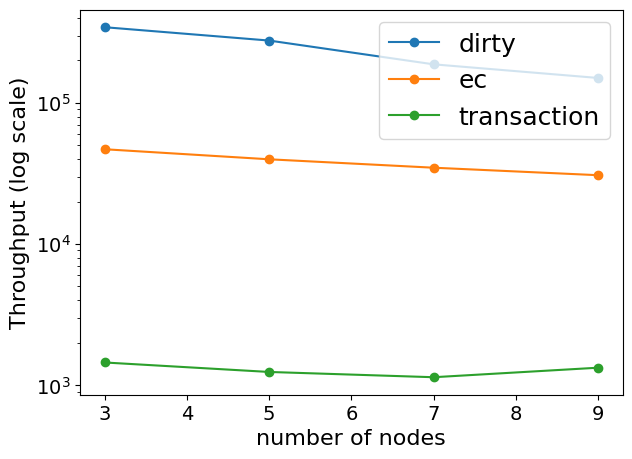

In [22]:
dirty_tp = [323756,265932,186646,147151]
ec_tp = [33420,30091,27053,23571]
trans_tp = [1525,1253,1114,1296]


dirty_tp = [343950,276670,187719,150287]
ec_tp=[46945,39848,34735,30743]
trans_tp = [1446,1239,1137,1328]

nodes = list(range(3, 10, 2))

fig, ax = plt.subplots()
ax.semilogy(nodes, dirty_tp, marker='o', label='dirty')
ax.semilogy(nodes, ec_tp, marker='o', label='ec')
ax.semilogy(nodes, trans_tp, marker='o', label='transaction')

ax.set_ylabel('Throughput (log scale)')
ax.set_xlabel('Number of nodes')
ax.legend()

fig.savefig(f'{graph_dir}tp_nodes_fixgen_caelum.pdf', bbox_inches='tight')

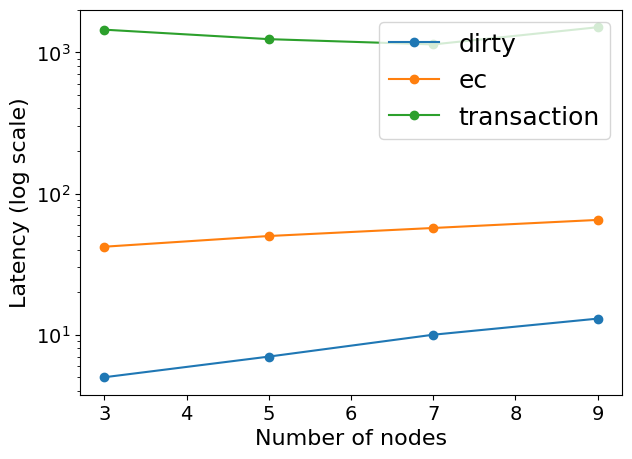

In [24]:
dirty_lat = [6,7,10,13]
ec_lat = [59,66,73,84]
trans_lat = [1311,1595,1794,1543]


dirty_lat = [ 5, 7, 10, 13]
ec_lat = [42, 50, 57, 65]
trans_lat = [1446,1239,1137,1505]




nodes = [3,5,7,9]

fig, ax = plt.subplots()
ax.semilogy(nodes, dirty_lat, marker = 'o', label='dirty')
ax.semilogy(nodes, ec_lat, marker='o', label='ec')
ax.semilogy(nodes, trans_lat, marker='o', label='transaction')
ax.set_ylabel('Latency (log scale)')
ax.set_xlabel('Number of nodes')
ax.legend()

fig.savefig(f'{graph_dir}lat_nodes_fixgen_caelum.pdf', bbox_inches='tight')

#### generator nodes increase as table nodes

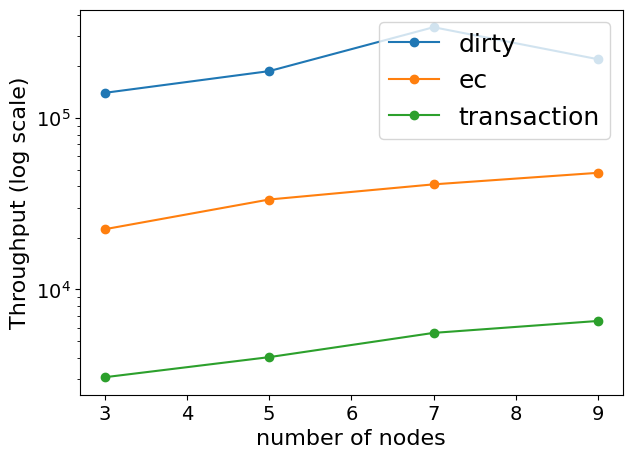

In [4]:
dirty_tp = [139958,187325,337636,219772]
ec_tp = [22445,33441,40984,47849]
trans_tp = [3080,4033,5584,6553]
nodes = list(range(3, 10, 2))

fig, ax = plt.subplots()
ax.semilogy(nodes, dirty_tp, marker='o', label='dirty')
ax.semilogy(nodes, ec_tp, marker='o',label='ec')
ax.semilogy(nodes, trans_tp, marker='o', label='transaction')

ax.set_ylabel('Throughput (log scale)')
ax.set_xlabel('number of nodes')
ax.legend()

fig.savefig(f'{graph_dir}tp_nodes_caelum.pdf', bbox_inches='tight')

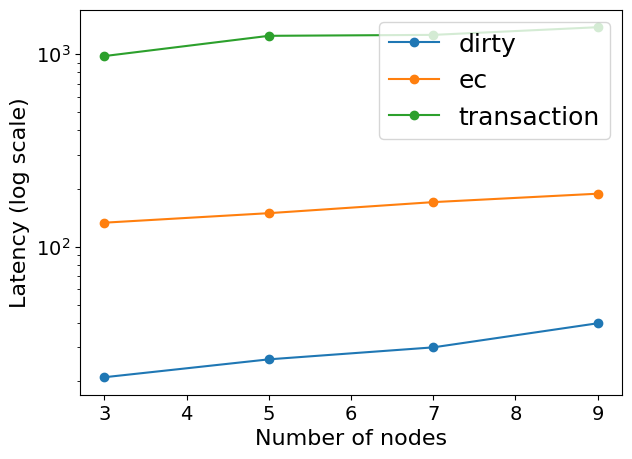

In [12]:
dirty_lat = [21,26,30,40]
ec_lat = [133,149,170,188]
trans_lat = [973,1239,1253,1373]
nodes = [3,5,7,9]

fig, ax = plt.subplots()
ax.semilogy(nodes, dirty_lat, marker='o', label='dirty')
ax.semilogy(nodes, ec_lat, marker='o', label='ec')
ax.semilogy(nodes, trans_lat, marker='o', label='transaction')
ax.set_ylabel('Latency (log scale)')
ax.set_xlabel('Number of nodes')
ax.legend()

fig.savefig(f'{graph_dir}lat_nodes_caelum.pdf', bbox_inches='tight')

### Number of generators per node

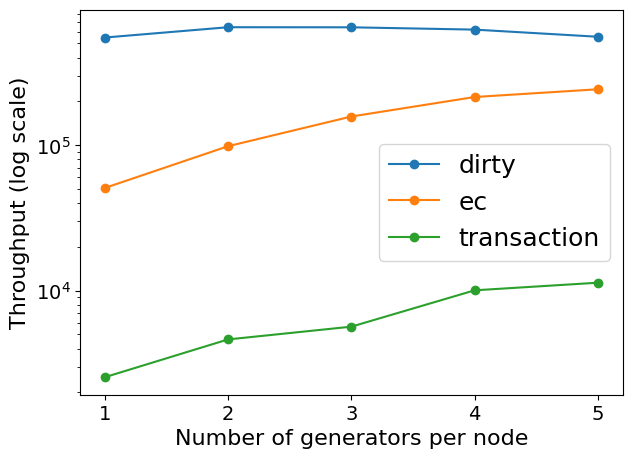

In [13]:
dirty_tp_generators = [548645,645953,645172,621964,555519]
ec_tp_generators = [50768,98314,157287,214163,242067]
trans_tp_generators = [2543,4625,5659,10058,11345]


generators_per_node = list(range(1, 6))

fig, ax = plt.subplots()
ax.semilogy(generators_per_node, dirty_tp_generators, marker='o', label='dirty')
ax.semilogy(generators_per_node, ec_tp_generators, marker='o', label='ec')
ax.semilogy(generators_per_node, trans_tp_generators, marker='o', label='transaction')
ax.set_ylabel('Throughput (log scale)')

ax.set_xlabel('Number of generators per node')
ax.set_xticks(generators_per_node)
ax.legend()

fig.savefig(f'{graph_dir}tp_generators_caelum.pdf', bbox_inches='tight')


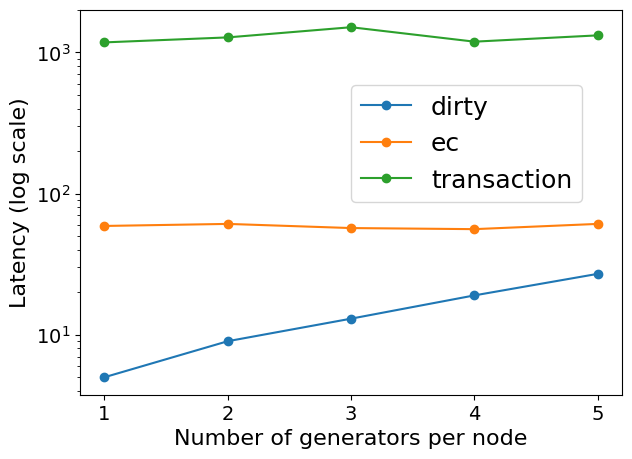

In [14]:

dirty_lat_generators = [5,9,13,19,27]
ec_lat_generators = [59,61,57,56,61]
trans_lat_generators = [1179,1279,1510,1193,1322]

fig,ax = plt.subplots()
ax.semilogy(generators_per_node, dirty_lat_generators,marker='o',  label='dirty')
ax.semilogy(generators_per_node, ec_lat_generators, marker='o', label='ec')
ax.semilogy(generators_per_node, trans_lat_generators, marker='o', label='transaction')
ax.set_ylabel('Latency (log scale)')
ax.set_xlabel('Number of generators per node')
ax.set_xticks(generators_per_node)
ax.legend(loc = (0.5, 0.5))

fig.savefig(f'{graph_dir}lat_generators_caelum.pdf', bbox_inches='tight')

### subscriber table size

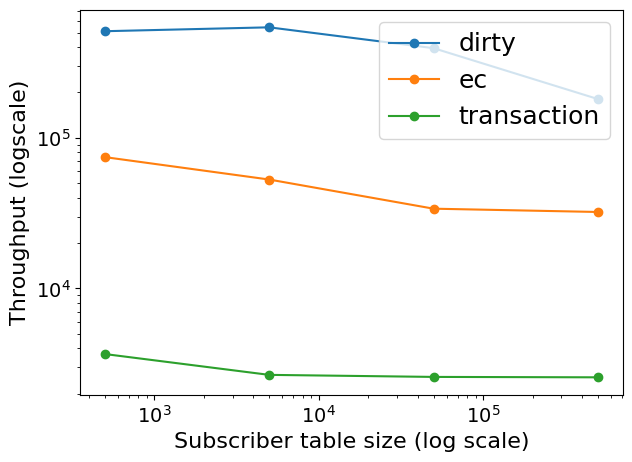

In [15]:
dirty_tp_sub = np.array([510560,541912,393917,180847])
ec_tp_sub = np.array([74431,52816,33812,32150])
trans_tp_sub = np.array([3660,2661,2579,2563])

sub_table_sz = [500 * i for i in [1, 10, 100, 1000]]

fig, ax = plt.subplots()
ax.loglog(sub_table_sz, dirty_tp_sub,marker='o',  label='dirty')
ax.loglog(sub_table_sz, ec_tp_sub,marker='o',  label='ec')
ax.loglog(sub_table_sz, trans_tp_sub, marker='o', label='transaction')

ax.set_ylabel('Throughput (logscale)')
ax.set_xlabel('Subscriber table size (log scale)')
ax.legend()

fig.savefig(f'{graph_dir}tp_table_caelum.pdf', bbox_inches='tight')

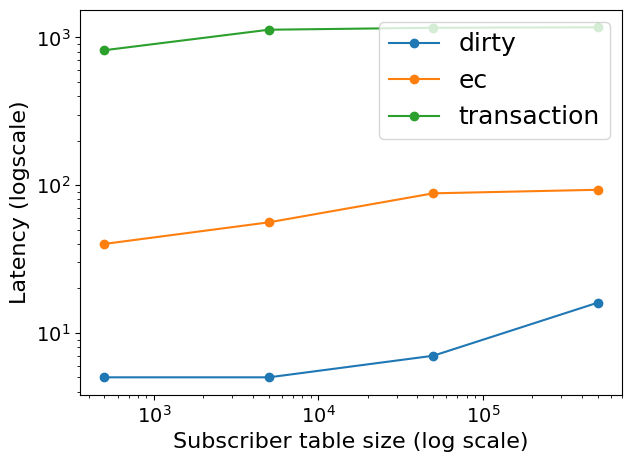

In [16]:
dirty_lat_sub = [5,5,7,16]
ec_lat_sub = [40,56,88,93]
trans_lat_sub = [819,1127,1162,1170]

sub_table_sz = [500 * i for i in [1, 10, 100, 1000]]

fig, ax = plt.subplots()
ax.loglog(sub_table_sz, dirty_lat_sub,marker='o',  label='dirty')
ax.loglog(sub_table_sz, ec_lat_sub,marker='o',  label='ec')
ax.loglog(sub_table_sz, trans_lat_sub,marker='o',  label='transaction')

ax.set_ylabel('Latency (logscale)')
ax.set_xlabel('Subscriber table size (log scale)')
ax.legend()

fig.savefig(f'{graph_dir}lat_table_caelum.pdf', bbox_inches='tight')

### workload types

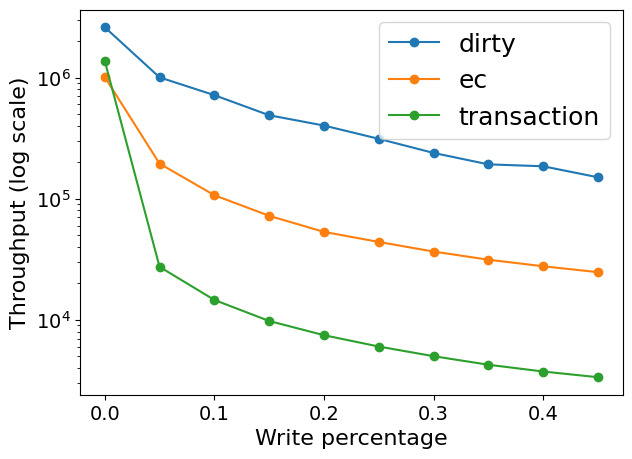

In [17]:
dirty_tp_rw = [150271,185333,192186,238836,312339,401953,489074,716414,1004851,2607727]
ec_tp_rw = [24735,27688,31352,36609,43963,53212,72242,106888,194816,1010491]
trans_tp_rw = [3356,3740,4256,5006,6015,7463,9775,14589,27370,1371563]

dirty_tp_rw = np.array(dirty_tp_rw)
ec_tp_rw = np.array(ec_tp_rw)
trans_tp_rw = np.array(trans_tp_rw)

write_pct = [1 - (i * 0.1 + (1 - 0.1 * i) * 0.5) for i in range(1, 11)]
fig, ax = plt.subplots()
ax.semilogy(write_pct, dirty_tp_rw,marker='o',  label='dirty')
ax.semilogy(write_pct, ec_tp_rw,marker='o',  label='ec')
ax.semilogy(write_pct, trans_tp_rw,marker='o',  label='transaction')
ax.set_ylabel('Throughput (log scale)')
ax.set_xlabel('Write percentage')
ax.legend()


fig.savefig(f'{graph_dir}tp_rw_caelum.pdf', bbox_inches='tight')

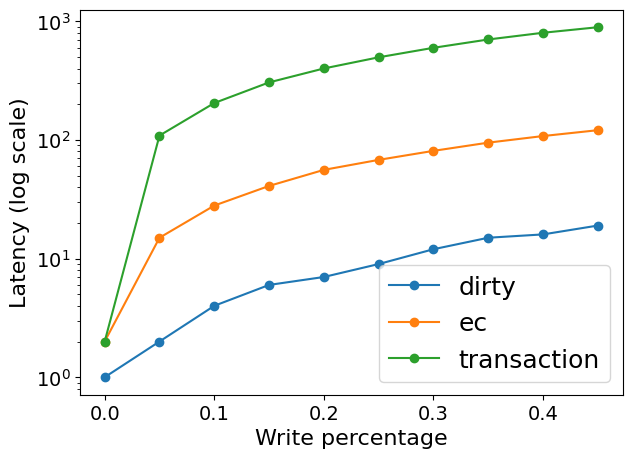

In [18]:
dirty_lat_rw = [19,16,15,12,9,7,6,4,2,1]
ec_lat_rw = [121,108,95,81,68,56,41,28,15,2]
trans_lat_rw = [893,802,704,599,498,401,306,205,109,2]

dirty_lat_rw = np.array(dirty_lat_rw)
ec_lat_rw = np.array(ec_lat_rw)
trans_lat_rw = np.array(trans_lat_rw)

write_pct = [1 - (i * 0.1 + (1 - 0.1 * i) * 0.5) for i in range(1, 11)]
fig, ax = plt.subplots()
ax.semilogy(write_pct, dirty_lat_rw,marker='o',  label='dirty')
ax.semilogy(write_pct, ec_lat_rw,marker='o',  label='ec')
ax.semilogy(write_pct, trans_lat_rw,marker='o',  label='transaction')
ax.set_ylabel('Latency (log scale)')
ax.set_xlabel('Write percentage')
ax.legend()

fig.savefig(f'{graph_dir}lat_rw_caelum.pdf', bbox_inches='tight')

### network partition

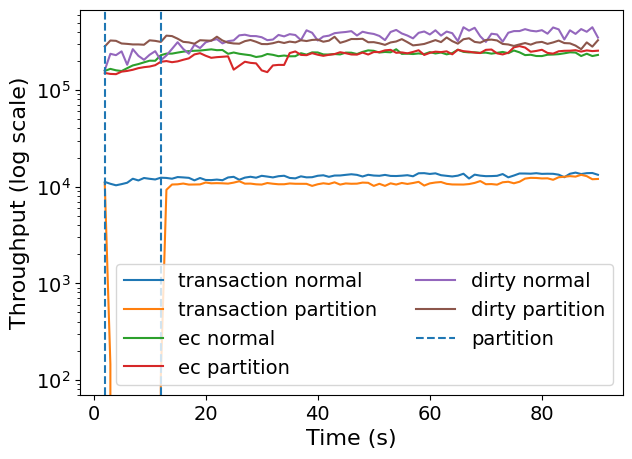

In [9]:
trans_tp_normal = [11178,10694,10313,10604,10959,12064,
                                   11574,12276,12040,11852,12364,12288,12067,
                                   12550,12446,12319,11605,12274,11706,11673,
                                   11817,11639,12435,12620,11764,12384,12642,
                                   12358,12930,12699,12450,12809,12947,12286,
                                   12166,12768,12461,12509,12941,13094,12623,
                                   13013,13032,13232,13417,13225,12722,13247,
                                   13014,12937,13214,12895,12863,12967,13116,
                                   12788,13737,13777,13518,13716,13118,12920,
                                   12734,12976,13584,12123,13293,12982,12824,
                                   12849,12926,13482,12466,13018,13664,13654,
                                   13602,13760,13543,13590,13560,13282,12508,
                                   13574,13956,13488,13774,13826,13248]
trans_tp_partition = [10799,144,0,0,0,0,0,0,0,0,106,9264,
                                   10507,10557,10751,10488,10510,10538,11021,
                                   10812,10856,10811,10733,10992,11358,10723,
                                   10737,10558,10497,10886,10700,10571,10574,
                                   10773,10693,10686,10677,10167,10572,10823,
                                   10638,11070,10489,10780,10694,10722,10999,
                                   10941,10165,10688,10172,10810,10501,10903,
                                   10648,10888,11197,10249,10796,11025,11149,
                                   10676,10521,10505,10495,10619,10915,11406,
                                   10586,10620,10472,11084,11219,10818,11219,
                                   12096,12313,12280,12145,12181,11760,12493,
                                   12639,12831,12684,13242,12825,11915,11996]

ec_tp_normal=[

157792,165638,160133,157384,168483,
                                   179814,185764,193590,201388,201027,229630,
                                   238396,238368,244333,249861,252938,255212,
                                   256461,260153,263927,258853,259829,237274,
                                   244811,237634,233240,229231,219940,224245,
                                   236309,231646,224175,227720,223655,224093,
                                   240788,232734,245572,245039,233710,233254,
                                   236040,233914,244270,243616,236078,248343,
                                   257683,254900,244721,248040,246014,264514,
                                   236997,238159,236023,239483,235716,247088,
                                   239276,244596,234327,241223,261677,248618,
                                   245489,245926,242839,244080,238252,242927,
                                   248117,240901,256855,245946,230113,232056,
                                   225197,224826,232162,233196,235388,240229,
                                   245885,244460,225077,237791,225023,231008]

    

ec_tp_partition = [
150252,146937,146069,155111,157799,
                                   162150,168601,172575,175183,180886,196286,
                                   199553,194318,198151,205827,212882,233834,
                                   241033,226650,215701,219127,221123,223397,
                                   162646,178768,196450,191203,189078,159752,
                                   153323,179944,182197,181991,241633,251210,
                                   231308,229771,241047,232277,226185,231801,
                                   235792,246405,240620,233626,232810,244385,
                                   233388,247740,247194,257670,260789,243156,
                                   245372,239961,248168,258365,230941,242659,
                                   249845,247057,251901,234436,261495,252575,
                                   249475,244352,241623,260891,262836,239839,
                                   233761,243607,276894,285346,275512,249205,
                                   254172,261314,242335,238236,252142,254974,
                                   255566,258700,250218,257461,253173,255636
]

dirty_tp_normal = [
   160774,237328,229813,251598,182723,265148,
226215,205697,231912,252593,202944,228195,
266938,312876,266588,237980,294724,272281,
311831,326108,336917,304471,321167,326750,
368614,374283,362762,361988,352423,328617,
333421,372331,359665,379199,371661,328811,
415788,392024,325910,358185,365719,388044,
394535,399460,407411,367410,401741,389185,
381112,363350,328948,399496,419528,385725,
366841,343006,391418,404122,376336,415738,
366547,403412,388180,321246,447236,412549,
441504,360478,315151,383208,376602,317063,
392306,407984,408255,427256,411652,405239,
416906,383721,444997,424834,334287,415620,
381587,428062,401384,447447,349724
]

dirty_tp_partition = [
282740,326037,323422,303599,300684,
296783,296860,294674,327450,323172,315169,
366051,362127,340324,315723,311568,301883,
328119,325907,323986,356787,325977,309843,
303768,302027,320977,330188,316231,299611,
298937,305572,316631,307157,317495,311653,
327899,321793,330458,332857,316578,324765,
356085,308376,320784,337865,337474,339494,
312713,313389,304993,293772,311142,318466,
336853,313391,290190,294379,300179,313948,
329081,313741,350251,321051,302321,335755,
343765,315339,309375,329777,333144,326237,
300343,296542,286285,296815,306700,295470,
310622,315362,300788,311353,325482,306656,
304558,288681,264840,311507,281691,328111
]

x = list(range(2, 91))

fig, ax = plt.subplots()


ax.semilogy(x, trans_tp_normal, label='transaction normal')
ax.semilogy(x, trans_tp_partition, label='transaction partition')
ax.semilogy(x, ec_tp_normal, label='ec normal')
ax.semilogy(x, ec_tp_partition, label='ec partition')
ax.semilogy(x, dirty_tp_normal, label='dirty normal')
ax.semilogy(x, dirty_tp_partition, label='dirty partition')
ax.axvline(x=2, color=colours[0], linestyle='--', label='partition')
ax.axvline(x=12, color=colours[0], linestyle='--')
ax.set_ylabel('Throughput (log scale)')
ax.set_xlabel('Time (s)')
ax.legend(ncols=2, fontsize='medium')

fig.savefig(f'{graph_dir}tp_time_partition.pdf', bbox_inches='tight')
